In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pmdarima import auto_arima

In [2]:
df=pd.read_csv("Mahakal_TimeSeriesData.csv")
df.head()

,Date,Tweets
0,11-Mar-21,2365
1,12-Mar-21,1211
2,13-Mar-21,400
3,14-Mar-21,285
4,15-Mar-21,203


In [3]:
df['Date']=pd.to_datetime(df['Date'])
df.head()

,Date,Tweets
0,2021-03-11,2365
1,2021-03-12,1211
2,2021-03-13,400
3,2021-03-14,285
4,2021-03-15,203


In [4]:
df.set_index('Date',inplace=True)
df.index.freq="D"
df.head()

,Tweets
Date,
2021-03-11,2365
2021-03-12,1211
2021-03-13,400
2021-03-14,285
2021-03-15,203


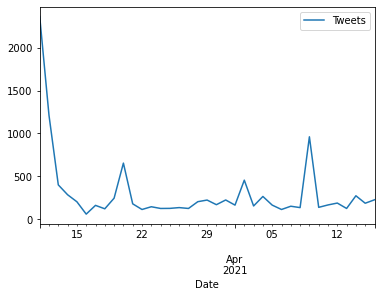

In [5]:
df.plot();

In [6]:
# Testing For stationarity

from statsmodels.tsa.stattools import adfuller

In [7]:
# H0: It is non stationary
# H1: It is stationary
def adfuller_test(Tweets):
    result = adfuller(Tweets)
    labels = ["ADF Test statistics","P-value","#Lags Used","Number of Observation Used"]
    for value,labels in zip(result,labels):
        print(labels+' : '+str(value) )
    if result[1] <= 0.05:
        print("Strong evidence against null hypothesis")
    else:
        print("weak evidence against null hypothesis")

In [8]:
adfuller_test(df["Tweets"])

ADF Test statistics : -8.772784249101026
P-value : 2.494858049465755e-14
#Lags Used : 0
Number of Observation Used : 36
Strong evidence against null hypothesis


#### It is stationary data

# Differencing

In [34]:
#df['Tweets_First_Difference'] = df['Tweets']-df['Tweets'].shift(2)
#df['Tweets'].shift(2)

In [33]:
# Again test dickey fuller test
#adfuller_test(df['Tweets_First_Difference'].dropna())

In [117]:
#df['Tweets_First_Difference'].plot();

# Auto Regressive Model

* Identification of an AR model is often best done with the PACF.
* Identification of an MA model is often best done with the ACF rather than PACF.

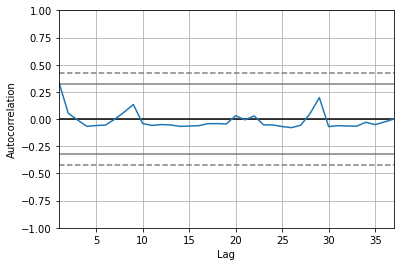

In [9]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Tweets']);

In [10]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
import statsmodels.api as sm

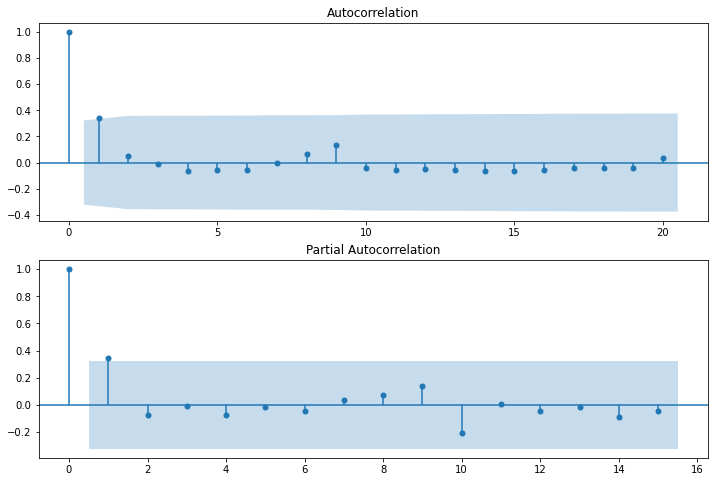

In [11]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Tweets'].iloc[0:],lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Tweets'].iloc[0:],lags=15,ax=ax2)

In [12]:
# For non-seasonal data 
# p=1, d=0, q=0 
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA

In [13]:
model = ARMA(df['Tweets'],order=(1,0))
model_fit1=model.fit()

C:\Users\asus\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [14]:
model_fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Tweets   No. Observations:                   37
Model:                     ARMA(1, 0)   Log Likelihood                -267.954
Method:                       css-mle   S.D. of innovations            331.826
Date:                Tue, 04 May 2021   AIC                            541.908
Time:                        21:06:00   BIC                            546.741
Sample:                    03-11-2021   HQIC                           543.612
                         - 04-16-2021                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          557.5694    407.441      1.368      0.171    -241.000    1356.139
ar.L1.Tweets     0.8630      0.138      6.261      0.000       0.593       1.133
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1587           +0.0000j            1.1587            0.0000
-----------------------------------------------------------------------------
"""

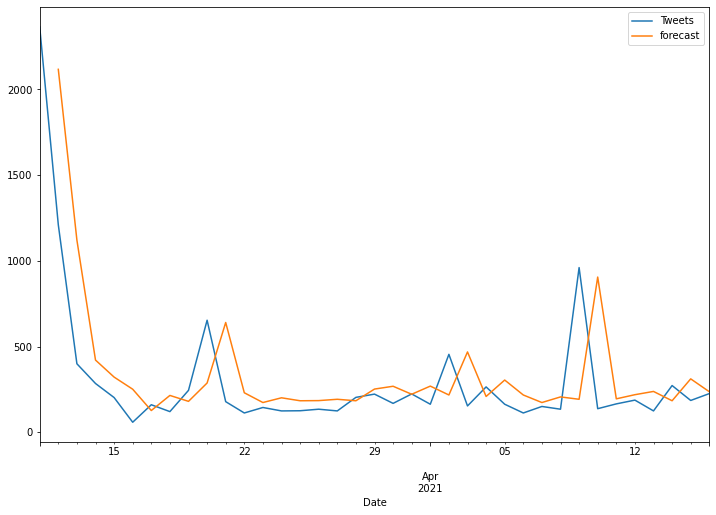

In [15]:
df['forecast']=model_fit1.predict(start=1,end=39, dynamic=False)
#pd.Series(model_fit1.fittedvalues,copy=True)
df[['Tweets','forecast']].plot(figsize=(12,8));

### Forecast for next two days

In [16]:
model_fit1.forecast(steps=2)[0]

array([271.42104794, 310.61995422])

### Using Auto ARIMA 

In [9]:
import pmdarima as pm

In [10]:
def arimamodel(df):
    automodel=pm.auto_arima(df,start_p=0,start_q=0,max_p=4,max_q=4,test="adf",seasonal=False,trace=True)
    return automodel

In [11]:
arimamodel(df["Tweets"])

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=568.887, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=541.635, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=543.617, Time=0.20 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=543.620, Time=0.19 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.32 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=541.908, Time=0.10 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 1.098 seconds


ARIMA(order=(1, 0, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [13]:
train_len=int(len(df)*0.8)

In [15]:
train=df.iloc[:train_len]
test=df.iloc[train_len:]
print(train.shape)
print(test.shape)

(29, 1)
(8, 1)


In [17]:
from statsmodels.tsa.arima_model import ARIMA 
model=ARIMA(train,order=(1,0,0))
model_fit=model.fit()
model_fit.summary()

C:\Users\asus\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Tweets   No. Observations:                   29
Model:                     ARMA(1, 0)   Log Likelihood                -208.246
Method:                       css-mle   S.D. of innovations            306.699
Date:                Sun, 11 Jul 2021   AIC                            422.492
Time:                        21:46:56   BIC                            426.594
Sample:                    03-11-2021   HQIC                           423.776
                         - 04-08-2021                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          785.3611    695.619      1.129      0.259    -578.027    2148.749
ar.L1.Tweets     0.9363      0.075     12.530      0.000       0.790       1.083
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0680           +0.0000j            1.0680            0.0000
-----------------------------------------------------------------------------
"""

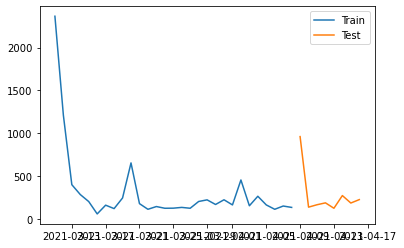

In [18]:
plt.plot(train ,label="Train")
plt.plot(test,label="Test")
plt.legend()

In [20]:
start=len(train)
end=len(df)-1
print(start,end)

29 36


In [21]:
ypred_test=model_fit.predict(start=start,end=end)

In [22]:
ypred_test

2021-04-09    176.425468
2021-04-10    215.212294
2021-04-11    251.528551
2021-04-12    285.531604
2021-04-13    317.368794
2021-04-14    347.178080
2021-04-15    375.088630
2021-04-16    401.221387
Freq: D, dtype: float64

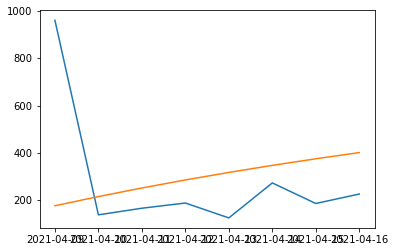

In [23]:
plt.plot(test)
plt.plot(ypred_test)

In [24]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse=mean_squared_error(test,ypred_test)
mae=mean_absolute_error(test,ypred_test)
print("MSE is ",mse)
print("RMSE is ",np.sqrt(mse))
print("MAE is",mae)

MSE is  93413.95838361615
RMSE is  305.63697155876963
MAE is 209.46298410025796
